1) Use the flight data from Interpretation Challenges I
For the classification (not delayed: 0, delayed: 1) use
a decision tree
Plot the decision tree in a graphical form with a depth
of 3
Plot the decision tree in text form
Compare both results

In [24]:
import pandas as pd
data = pd.read_csv("aa-delays-2023.csv", sep=',')
pd.set_option('display.max_columns', None)
data['TOTAL_DELAY'] = (data['CARRIER_DELAY'] + data['WEATHER_DELAY'] + data['NAS_DELAY'] + data['SECURITY_DELAY'] + data['LATE_AIRCRAFT_DELAY'] + data['DEP_DELAY']).astype(float)
mod_data = data.drop(['Unnamed: 27'], axis=1)
flight_data = data.drop(['ARR_DELAY', 'Unnamed: 27'], axis=1)
flight_data = flight_data.drop(data.dtypes[data.dtypes == 'object'].index, axis=1)
flight_data['DELAY'] = (data['TOTAL_DELAY'] > 15).astype(int)
import numpy as np 
flight_data['ARR_DELAY'] = np.cos(data['ARR_DELAY']).astype('float')
display(flight_data)

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TOTAL_DELAY,DELAY,ARR_DELAY
0,2429,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,0.0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,-5.0,0,-0.532833
1,2427,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,0.0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,-8.0,0,0.424179
2,2426,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,0.0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,-5.0,0,0.907447
3,2425,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,0.0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,6.0,0,-0.416147
4,2424,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,0.0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,20.0,1,0.136737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,657,713,743.0,30.0,25.0,808.0,1047.0,6.0,1009,1053.0,0.0,0.0,176.0,190.0,159.0,1062.0,0.0,30.0,14.0,0.0,0.0,74.0,1,0.999843
2832,658,2016,2017.0,1.0,20.0,2037.0,2259.0,8.0,2314,2307.0,0.0,0.0,178.0,170.0,142.0,1062.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.753902
2833,660,1630,1621.0,-9.0,18.0,1639.0,1730.0,10.0,1749,1740.0,0.0,0.0,79.0,79.0,51.0,280.0,0.0,0.0,0.0,0.0,0.0,-9.0,0,-0.911130
2834,665,750,756.0,6.0,16.0,812.0,1126.0,4.0,1136,1130.0,0.0,0.0,226.0,214.0,194.0,1249.0,0.0,0.0,0.0,0.0,0.0,6.0,0,0.960170


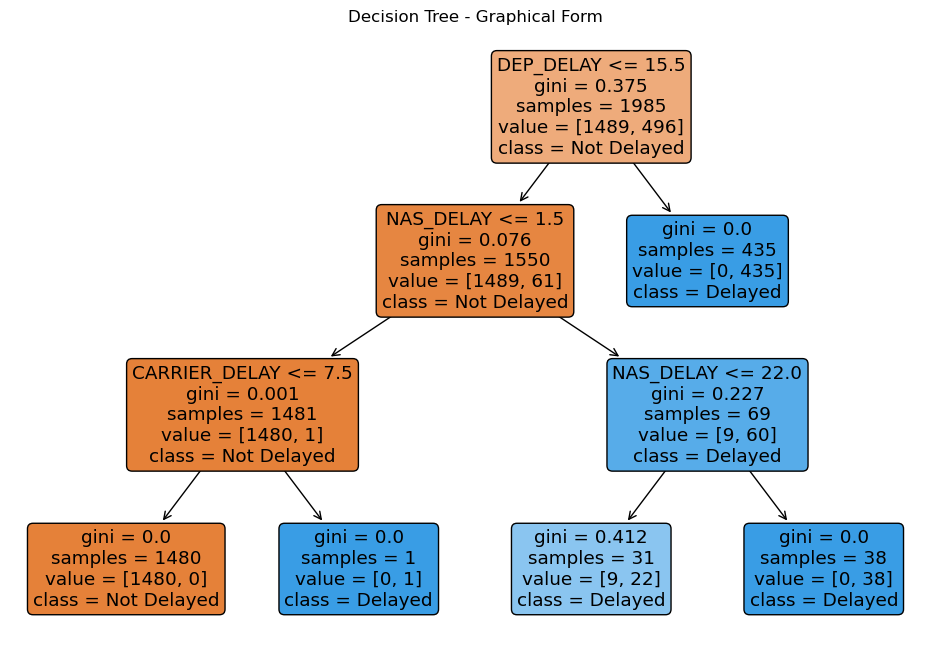

Decision Tree - Text Form:
|--- DEP_DELAY <= 15.50
|   |--- NAS_DELAY <= 1.50
|   |   |--- CARRIER_DELAY <= 7.50
|   |   |   |--- class: 0
|   |   |--- CARRIER_DELAY >  7.50
|   |   |   |--- class: 1
|   |--- NAS_DELAY >  1.50
|   |   |--- NAS_DELAY <= 22.00
|   |   |   |--- class: 1
|   |   |--- NAS_DELAY >  22.00
|   |   |   |--- class: 1
|--- DEP_DELAY >  15.50
|   |--- class: 1



In [25]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

features = ['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
            'ARR_TIME', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
            'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'ARR_DELAY']

X = flight_data[features]
y = flight_data['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=features, class_names=['Not Delayed', 'Delayed'], filled=True, rounded=True)
plt.title("Decision Tree - Graphical Form")
plt.show()

tree_rules = export_text(dt_classifier, feature_names=features)
print("Decision Tree - Text Form:")
print(tree_rules)

2) What are advantages and disadvantages of
Explainable Boosting Machines?

Explainable Boosting Machines (EBMs) are a type of interpretable machine learning model designed to provide transparent and understandable predictions.

Advantages:
Interpretability:

Transparent Rule-Based Model: EBMs provide a rule-based representation of the model, making it easier for humans to understand the decision-making process. Each rule corresponds to a specific condition that contributes to the prediction.
Intuitive Feature Contributions: EBMs offer insights into how each feature contributes to the model's output, helping users interpret the importance of different variables.
Flexibility:

Feature Interactions: EBMs can capture complex interactions between features, allowing for a more nuanced understanding of the relationships within the data.
Handle Different Types of Features: EBMs can handle a mix of continuous and categorical features, making them versatile for various types of datasets.
Performance:

High Predictive Accuracy: Despite their focus on interpretability, EBMs can still achieve competitive predictive performance. They are capable of capturing non-linear relationships in the data.
No Black Box Issues:

No "Black Box" Problem: Unlike some complex models such as deep neural networks, EBMs provide a clear and interpretable model structure, reducing the "black box" nature of predictions.
Disadvantages:
Limited Complexity:

Limited Expressiveness: While EBMs can capture complex relationships, they may struggle to model extremely intricate patterns present in highly complex datasets. In such cases, more complex models like deep neural networks might outperform EBMs.
Assumption of Additivity:

Additivity Assumption: EBMs assume that the contribution of each feature is additive, which might not hold in certain situations where interactions between features are essential. This can lead to a potential oversimplification of the true underlying relationships.
Limited Scalability:

Computationally Intensive: Training EBMs can be computationally intensive, especially when dealing with large datasets. This can be a limitation when resources are constrained.
Potential for Overfitting:

Risk of Overfitting: Like other machine learning models, EBMs are susceptible to overfitting, particularly if the model complexity is not appropriately controlled.
Sensitive to Hyperparameters:

Hyperparameter Sensitivity: EBMs might be sensitive to the choice of hyperparameters, and finding the right set of hyperparameters for a specific problem might require careful tuning.
Data Quality Dependency:

Dependence on Data Quality: The interpretability of EBMs relies on the quality of the input data. If the data is noisy or contains errors, the interpretability of the model may be compromised.

3) Train a EBM using only a part of the features and
data

4) Explain the feature importance and the interactions
globally

In [26]:
from interpret import show
show(ebm.explain_global())

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


<!-- http://127.0.0.1:7001/2100680647696/ -->

5) Plot ROC and explain it globally

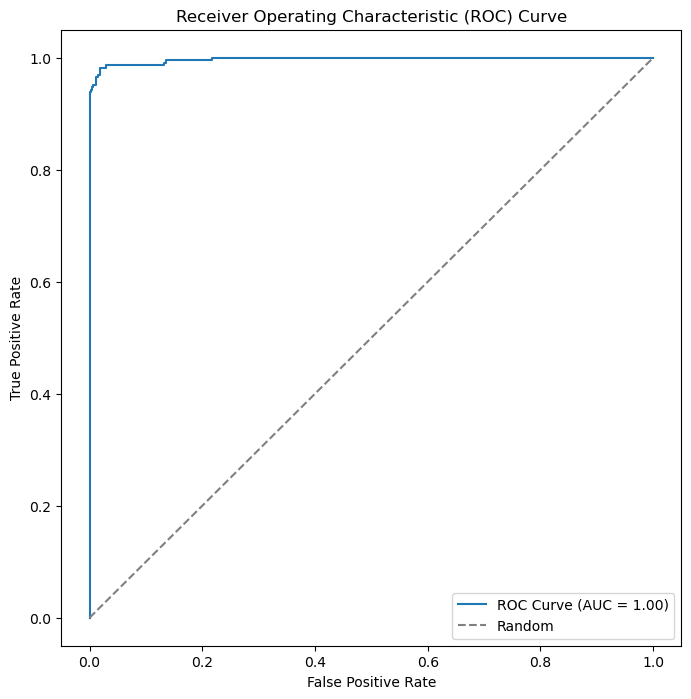

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score


features = ['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'DISTANCE']

X = flight_data[features]
y = flight_data['DELAY']

y_probs = ebm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

ROC curve is closer to the top left corner indicating a good fit model.

6) Plot Scope Rules and explain them

In [28]:
# import six
# import sys

# sys.modules['sklearn.externals.six'] = six

# from joblib import Memory
# from skrules import SkopeRules

# sr_mdl = SkopeRules (n_estimators = 200, precision_min=0.2, recall_min=0.01, _jobs=-1, random_state=rand, max_depth = 7, feature_names=X_train_abbrev2.columns) 
# sr_mdl.fit(X_train_abbrev2.iloc[sample2_idx], y_train_class.iloc[sample2_idx])

# print("SkopeRules\n",sr_mdl)

# print("Rules\n",sr_mdl.rules_ [0/3] )


7) Explain the feature importance and the interactions
of two features locally for a special dataset

In [30]:
show(ebm.explain_local(X, y, name=None))

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


<!-- http://127.0.0.1:7001/2100707818640/ -->